In [21]:
import os
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv("../data/mi_matched_precinct_use_this.csv")
df.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_white', 'prop_Black',
       'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k',
       'prop_more_than_100k', 'D_pct_vote', 'Weighted_ideology'],
      dtype='object')

In [23]:
x = df.drop(['prop_white', 'prop_higher', 'D_pct_vote', 'Weighted_ideology'], axis=1)
y = df['D_pct_vote']
x.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_under_hs', 'prop_under_30k', 'prop_30_to_50k',
       'prop_50_to_100k', 'prop_more_than_100k'],
      dtype='object')

In [24]:
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

match_vtd = X_test['VTD_ID'].to_numpy()
X_test.drop('VTD_ID', axis=1, inplace=True)
X_train.drop('VTD_ID', axis=1, inplace=True)

In [25]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))


Most accurate learning rate is: 0.1


R-squared for percent of democratic votes is: 0.617666317213521


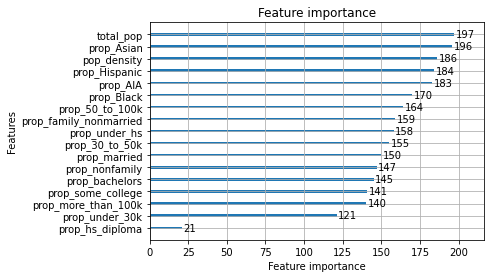

In [26]:
reg = lgb.LGBMRegressor(learning_rate=0.1)
reg.fit(X_train, y_train)
ydp_pred = reg.predict(X_test).transpose()
print("R-squared for percent of democratic votes is:", reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_ydp = np.column_stack((match_vtd, ydp_pred))



In [27]:
y = df['Weighted_ideology']
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

match_vtd = X_test['VTD_ID'].to_numpy()
X_test.drop('VTD_ID', axis=1, inplace=True)
X_train.drop('VTD_ID', axis=1, inplace=True)

In [28]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))

Most accurate learning rate is: 0.05


R-squared for weighted ideology is: 0.6212013688881


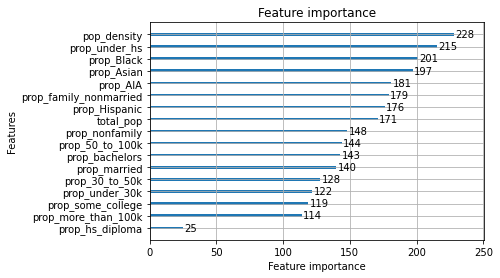

In [29]:
reg = lgb.LGBMRegressor(learning_rate=0.05)
reg.fit(X_train, y_train)
yw_pred = reg.predict(X_test)
print("R-squared for weighted ideology is:",reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_yw = np.column_stack((match_vtd, yw_pred))

In [30]:
df_ydp = pd.DataFrame(matched_ydp)
df_yw = pd.DataFrame(matched_yw)
os.makedirs("C:/Users/cvg11/Desktop/proj/elec-inspec-protec", exist_ok=True)
df_ydp.to_csv("C:/Users/cvg11/Desktop/proj/elec-inspec-protec/perc_dem.csv")
df_yw.to_csv("C:/Users/cvg11/Desktop/proj/elec-inspec-protec/weighted_id.csv")
